### Import de librerias

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Ejemplo de Kmeans en la documentacion Web de Sklearn

In [83]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [29, 4], [1, 0],
              [11, 2], [3, 4], [10, 0]])
#parametros para Kmeans : el numero de clusters 
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

array([[ 5.2,  1.6],
       [29. ,  4. ]])

### Ejemplo 2 : estadisticas sobre clientes de un Mall

### Import del data

In [31]:
df = pd.read_csv("datasets/Mall_Customers.csv" , index_col='CustomerID')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [32]:
##renombrar las columnas del csv
df.rename(columns={'Annual Income (k$)' : 'Income' , 'Spending Score (1-100)':'Spending_score'}, inplace=True)
df.head()

,Gender,Age,Income,Spending_score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### Descripcion de las estadisticas 

In [33]:
df.describe()

,Age,Income,Spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


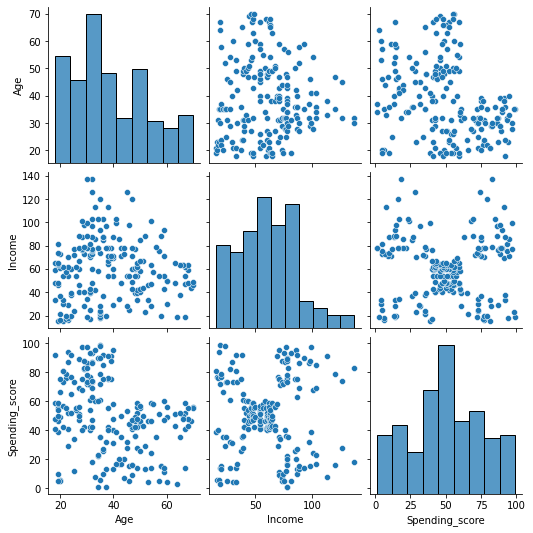

In [34]:
#los datos que queremos utilizar son edad , sueldo y su puntuacion de compras
sns.pairplot(df[['Age','Income','Spending_score']])

### kmeans con 5 clusters

In [35]:
import sklearn.cluster as cluster

In [36]:
#usamos 2 variables
kmeans = cluster.KMeans(n_clusters=5, init="k-means++")
kmeans = kmeans.fit(df[['Spending_score','Income']])

In [37]:
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [17.11428571, 88.2       ],
       [79.36363636, 25.72727273]])

### adjuntar clusters a los datos originales


In [38]:
df['Clusters'] = kmeans.labels_

In [39]:
df.head()

,Gender,Age,Income,Spending_score,Clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,4
3,Female,20,16,6,2
4,Female,23,16,77,4
5,Female,31,17,40,2


In [40]:
df['Clusters'].value_counts()

0    81
1    39
3    35
2    23
4    22
Name: Clusters, dtype: int64

### graficar los datos con clusters

<AxesSubplot:xlabel='Spending_score', ylabel='Income'>

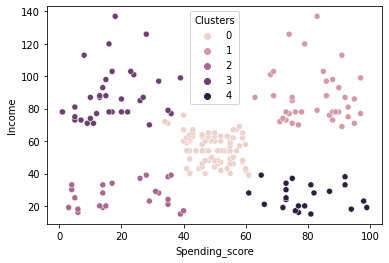

In [41]:
sns.scatterplot(x="Spending_score" , y = "Income", hue= 'Clusters', data=df)

### Ejemplo 3 : Csv de Pokemon

In [42]:
pokemon = pd.read_csv("datasets/pokemon.csv" , index_col='Name')
pokemon.head()


,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [43]:
pokemon.drop(['Legendary','#','Type 1','Type 2','Total'],axis=1,inplace=True)
pokemon.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Name,,,,,,,
Bulbasaur,45,49,49,65,65,45,1
Ivysaur,60,62,63,80,80,60,1
Venusaur,80,82,83,100,100,80,1
VenusaurMega Venusaur,80,100,123,122,120,80,1
Charmander,39,52,43,60,50,65,1


### Descripcion de las estadisticas

In [44]:
pokemon.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


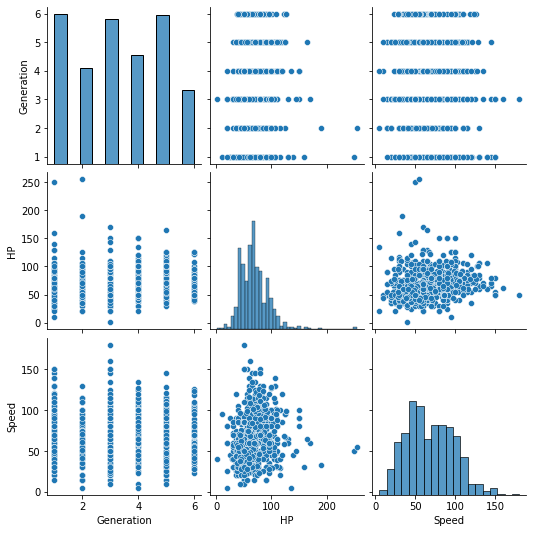

In [45]:
#los datos que se usaran son hp , ataque y la defensa
sns.pairplot(pokemon[['Generation','HP','Speed']])

In [46]:
#usamos 2 variables
kmeans = cluster.KMeans(n_clusters=5, init="k-means++")
kmeans = kmeans.fit(pokemon[['HP','Speed']])
kmeans.cluster_centers_


array([[148.68      ,  67.96      ],
       [ 51.35323383,  70.98507463],
       [ 53.34299517,  35.81642512],
       [ 77.76847291, 105.92118227],
       [ 88.65243902,  59.38414634]])

### adjuntamos los datos de los clusters a los datos originales

In [47]:
pokemon['Clusters'] = kmeans.labels_

In [48]:
pokemon.head()
#recordar que solo se estan usando las variables ataque y defensa para los clusters

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Clusters
Name,,,,,,,,
Bulbasaur,45,49,49,65,65,45,1,2
Ivysaur,60,62,63,80,80,60,1,1
Venusaur,80,82,83,100,100,80,1,4
VenusaurMega Venusaur,80,100,123,122,120,80,1,4
Charmander,39,52,43,60,50,65,1,1


In [49]:
pokemon['Clusters'].value_counts()

2    207
3    203
1    201
4    164
0     25
Name: Clusters, dtype: int64

### Graficar los datos con clusters

<AxesSubplot:xlabel='HP', ylabel='Defense'>

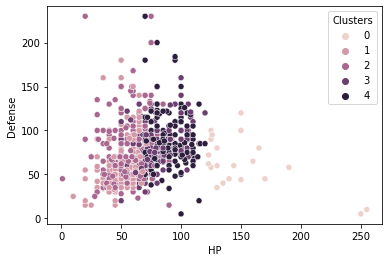

In [50]:
sns.scatterplot(x="HP" , y = "Defense", hue= 'Clusters', data=pokemon)

### Clasificacion por clusters

In [51]:
pokemon[pokemon['Clusters']==0].head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Clusters
Name,,,,,,,,
Wigglytuff,140,70,45,85,50,45,1,0
Chansey,250,5,5,35,105,50,1,0
Lapras,130,85,80,85,95,60,1,0
Vaporeon,130,65,60,110,95,65,1,0
Snorlax,160,110,65,65,110,30,1,0


### Ejemplo 4 Kmeans con datos del clima


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('minute_weather.csv' )


#data = pd.DataFrame(data.data, columns=data.feature_names)
data.head().transpose()

,0,1,2,3,4
rowID,0,1,2,3,4
hpwren_timestamp,2011-09-10 00:00:49,2011-09-10 00:01:49,2011-09-10 00:02:49,2011-09-10 00:03:49,2011-09-10 00:04:49
air_pressure,912.3,912.3,912.3,912.3,912.3
air_temp,64.76,63.86,64.22,64.4,64.4
avg_wind_direction,97.0,161.0,77.0,89.0,185.0
avg_wind_speed,1.2,0.8,0.7,1.2,0.4
max_wind_direction,106.0,215.0,143.0,112.0,260.0
max_wind_speed,1.6,1.5,1.2,1.6,1.0
min_wind_direction,85.0,43.0,324.0,12.0,100.0
min_wind_speed,1.0,0.2,0.3,0.7,0.1


son muchas filas , entonces tomaremos una muestra de cada 10ma fila

In [53]:
muestra_df = data[(data['rowID'] % 10) == 0]
muestra_df.shape

(158726, 13)

In [54]:
muestra_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937510,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [55]:
muestra_df[muestra_df['rain_accumulation'] == 0].shape

(157812, 13)

In [56]:
muestra_df[muestra_df['rain_duration'] == 0].shape

(157237, 13)

botar las filas con datos vacios

In [57]:
del muestra_df['rain_accumulation']
del muestra_df['rain_duration']

In [58]:
rows_before = muestra_df.shape[0]
muestra_df = muestra_df.dropna()
rows_after = muestra_df.shape[0]

Cuantas filas Botamos ?

In [59]:
print(rows_before - rows_after)

muestra_df.columns

46


Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

Seleccionamos las columnas de interes que queremos para el cluster

In [60]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [61]:
seleccion_df = muestra_df[features]

In [62]:
seleccion_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [63]:
seleccion_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


In [64]:
X = StandardScaler().fit_transform(seleccion_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

### Usando el cluster de Kmeans

In [65]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=12)


In [66]:
centers = model.cluster_centers_
centers

array([[-0.8377737 , -1.19845298,  0.37514891,  0.37451103,  0.47360688,
         0.36211151,  1.35913516],
       [-0.1559012 ,  0.86018633, -1.31068832, -0.59037877, -1.16636889,
        -0.60579414, -0.64485432],
       [ 0.13262538,  0.84577827,  1.40857928, -0.6383531 ,  1.67287179,
        -0.58902597, -0.71363142],
       [-0.21065373,  0.63424   ,  0.40840084,  0.73409963,  0.51655726,
         0.67218154, -0.15174156],
       [-1.18299128, -0.86959623,  0.44700986,  1.98392134,  0.53839255,
         1.94476521,  0.90770584],
       [ 1.37364278, -0.0855596 , -1.20626351, -0.03237265, -1.07535252,
        -0.01091234, -0.97966738],
       [ 0.23307496, -0.99782235,  0.6570425 , -0.54833282,  0.84676723,
        -0.53091707,  1.16725111],
       [ 0.05961698, -0.7856446 , -1.19651616, -0.57142749, -1.04264651,
        -0.58599561,  0.87494357],
       [-0.68903141,  0.55707079,  0.17918332, -0.58417788,  0.34879797,
        -0.59752079, -0.12094028],
       [ 0.74310778,  0.4091

In [67]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [68]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [69]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-0.837774,-1.198453,0.375149,0.374511,0.473607,0.362112,1.359135,0
1,-0.155901,0.860186,-1.310688,-0.590379,-1.166369,-0.605794,-0.644854,1
2,0.132625,0.845778,1.408579,-0.638353,1.672872,-0.589026,-0.713631,2
3,-0.210654,0.634240,0.408401,0.734100,0.516557,0.672182,-0.151742,3
4,-1.182991,-0.869596,0.447010,1.983921,0.538393,1.944765,0.907706,4
5,1.373643,-0.085560,-1.206264,-0.032373,-1.075353,-0.010912,-0.979667,5
6,0.233075,-0.997822,0.657042,-0.548333,0.846767,-0.530917,1.167251,6
7,0.059617,-0.785645,-1.196516,-0.571427,-1.042647,-0.585996,0.874944,7
8,-0.689031,0.557071,0.179183,-0.584178,0.348798,-0.597521,-0.120940,8
9,0.743108,0.409103,0.285817,-0.532709,0.472972,-0.539376,-0.769623,9
